In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('to_csv_all/to_csv/train/train_병합/train_3_매출정보.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Columns: 406 entries, 기준년월 to 이용금액대
dtypes: float64(1), int64(378), object(27)
memory usage: 7.3+ GB


In [4]:
## 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
## 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df, n):
    print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
    summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
    summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경
    summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
    summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산
    summary['최솟값'] = df.min(numeric_only=True).reindex(df.columns).values           # 최솟값
    summary['최댓값'] = df.max(numeric_only=True).reindex(df.columns).values           # 최댓값

    for i in range(n):
        summary[f"{i+1}번째 값"] = df.iloc[i].values
    
    return summary                                                     # 요약 테이블 반환

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(resumetable(df1, 1))

데이터셋 크기: (2400000, 406)


,피처,데이터 타입,결측값 개수,고유값 개수,최솟값,최댓값,1번째 값
0,기준년월,int64,0,6,201807.0,2.018120e+05,201807
1,ID,object,0,400000,NaN,NaN,TRAIN_000000
2,최종이용일자_기본,object,0,1275,NaN,NaN,20180719
3,최종이용일자_신판,object,0,1262,NaN,NaN,20180713
4,최종이용일자_CA,object,0,3097,NaN,NaN,20180719
5,최종이용일자_카드론,object,0,1667,NaN,NaN,미이용
6,최종이용일자_체크,object,0,2244,NaN,NaN,20180203
7,최종이용일자_일시불,object,0,1088,NaN,NaN,20180709
8,최종이용일자_할부,object,0,2246,NaN,NaN,20180713
9,이용건수_신용_B0M,int64,0,94,-3.0,9.000000e+01,11


In [6]:
# 막대 위에 숫자 표시 함수
def annotate_countplot(ax, spacing=5):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{int(height):,}',  # 예: 1,234
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, spacing),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

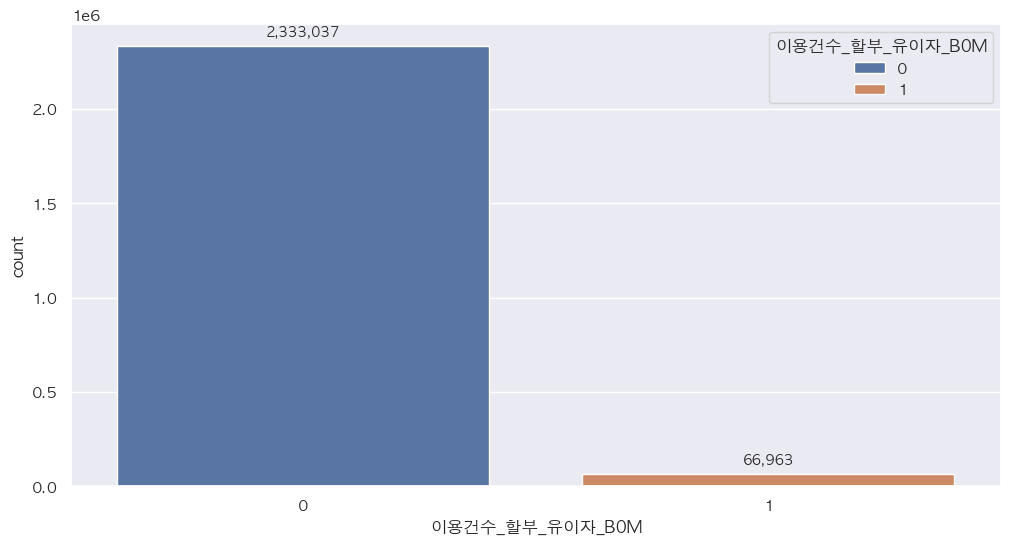

In [7]:
col1 = '이용건수_할부_유이자_B0M'.strip()
order1 = sorted(df1[col1].unique())

ax = sns.countplot(data=df1, x=col1, hue=col1, order=order1)
annotate_countplot(ax)
plt.show()

In [8]:
zero_count1 = (df1['이용건수_할부_유이자_B0M'] == 0).sum()
total1 = len(df1)
print(f"0값 개수: {zero_count1} ({zero_count1 / total1:.2%})")

0값 개수: 2333037 (97.21%)


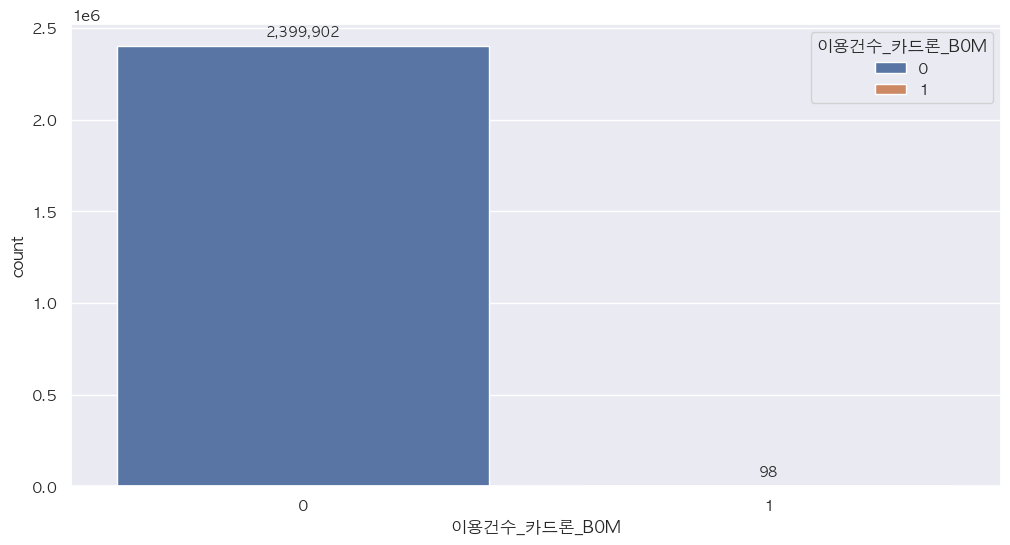

In [9]:
col2 = '이용건수_카드론_B0M'.strip()
order2 = sorted(df1[col2].unique())

ax = sns.countplot(data=df1, x=col2, hue=col2, order=order2)
annotate_countplot(ax)
plt.show()

In [10]:
zero_count2 = (df1['이용건수_카드론_B0M'] == 0).sum()
total2 = len(df1)
print(f"0값 개수: {zero_count2} ({zero_count2 / total2:.2%})")

0값 개수: 2399902 (100.00%)


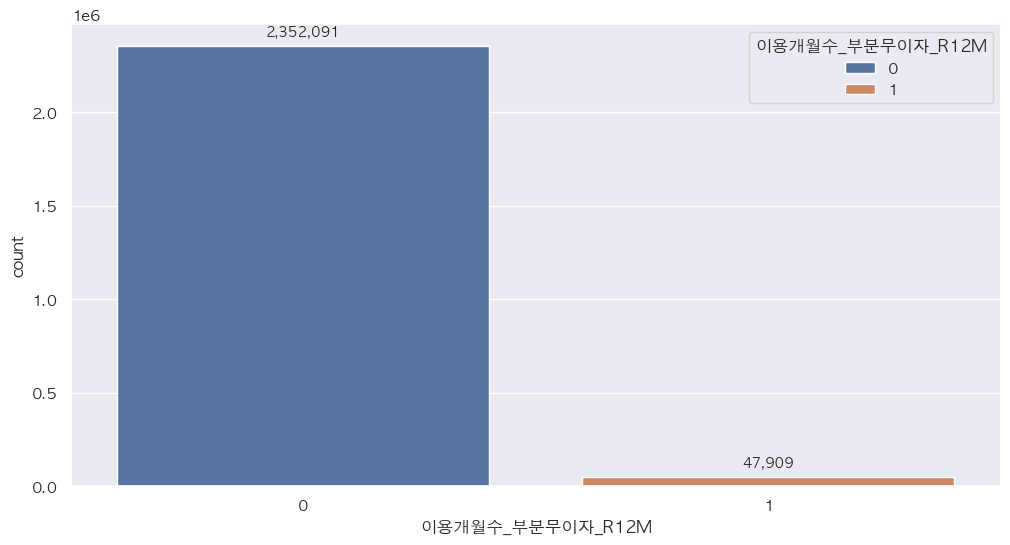

In [11]:
col3 = '이용개월수_부분무이자_R12M'.strip()
order3 = sorted(df1[col3].unique())

ax = sns.countplot(data=df1, x=col3, hue=col3, order=order3)
annotate_countplot(ax)
plt.show()

In [12]:
zero_count3 = (df1['이용개월수_부분무이자_R12M'] == 0).sum()
total3 = len(df1)
print(f"0값 개수: {zero_count3} ({zero_count3 / total3:.2%})")

0값 개수: 2352091 (98.00%)


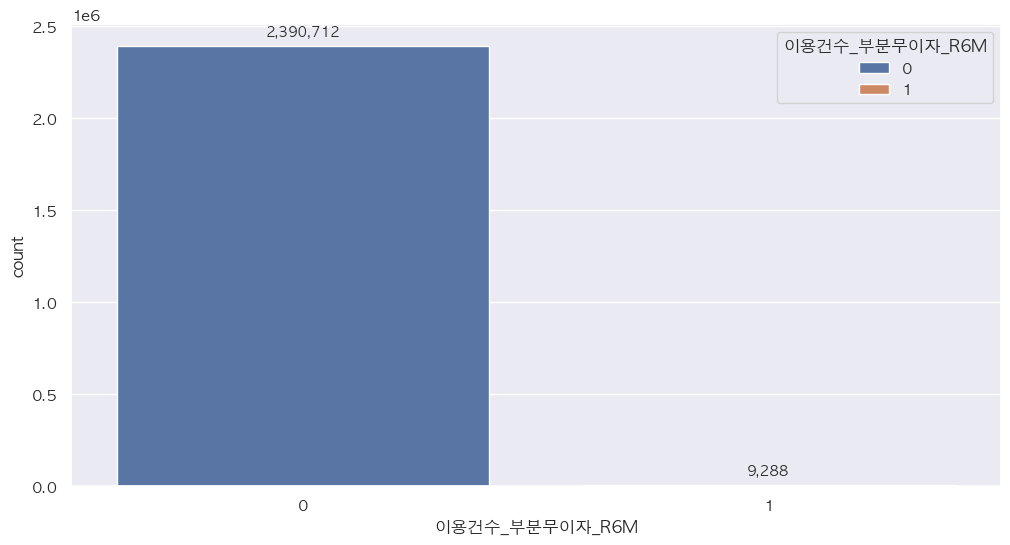

In [13]:
col4 = '이용건수_부분무이자_R6M'.strip()
order4 = sorted(df1[col4].unique())

ax = sns.countplot(data=df1, x=col4, hue=col4, order=order4)
annotate_countplot(ax)
plt.show()

In [14]:
zero_count4 = (df1['이용건수_부분무이자_R6M'] == 0).sum()
total4 = len(df1)
print(f"0값 개수: {zero_count4} ({zero_count4 / total4:.2%})")

0값 개수: 2390712 (99.61%)


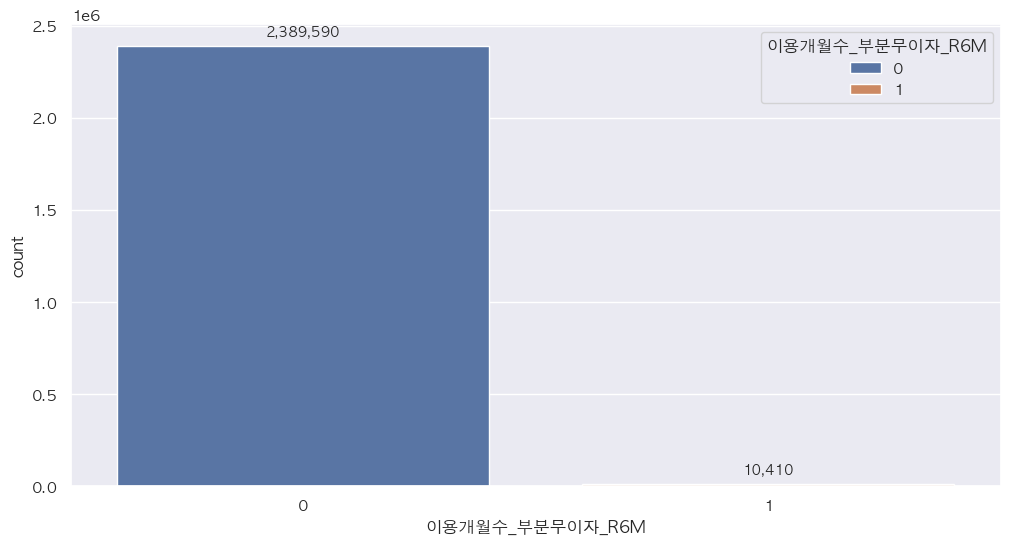

In [15]:
col5 = '이용개월수_부분무이자_R6M'.strip()
order5 = sorted(df1[col5].unique())

ax = sns.countplot(data=df1, x=col5, hue=col5, order=order5)
annotate_countplot(ax)
plt.show()

In [16]:
zero_count5 = (df1['이용개월수_부분무이자_R6M'] == 0).sum()
total5 = len(df1)
print(f"0값 개수: {zero_count5} ({zero_count5 / total5:.2%})")

0값 개수: 2389590 (99.57%)


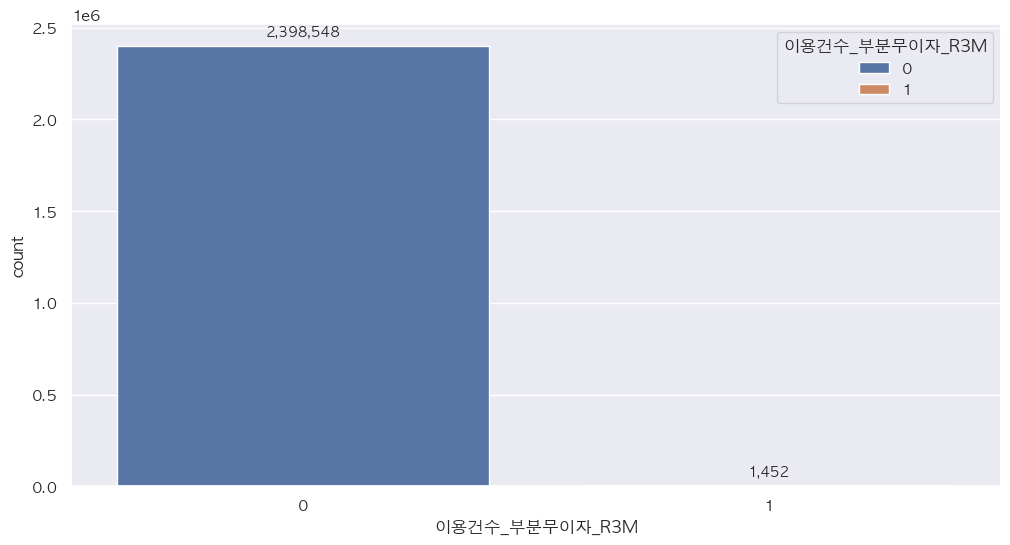

In [17]:
col6 = '이용건수_부분무이자_R3M'.strip()
order6 = sorted(df1[col6].unique())

ax = sns.countplot(data=df1, x=col6, hue=col6, order=order6)
annotate_countplot(ax)
plt.show()

In [18]:
zero_count6 = (df1['이용건수_부분무이자_R3M'] == 0).sum()
total6 = len(df1)
print(f"0값 개수: {zero_count6} ({zero_count6 / total6:.2%})")

0값 개수: 2398548 (99.94%)


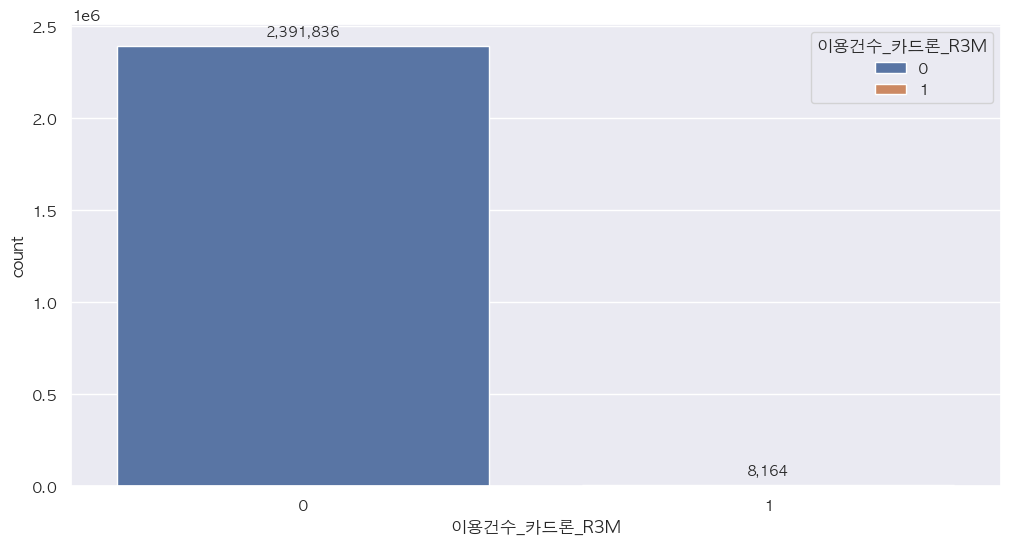

In [19]:
col7 = '이용건수_카드론_R3M'.strip()
order7 = sorted(df1[col7].unique())

ax = sns.countplot(data=df1, x=col7, hue=col7, order=order7)
annotate_countplot(ax)
plt.show()

In [20]:
zero_count7 = (df1['이용건수_카드론_R3M'] == 0).sum()
total7 = len(df1)
print(f"0값 개수: {zero_count7} ({zero_count7 / total7:.2%})")

0값 개수: 2391836 (99.66%)


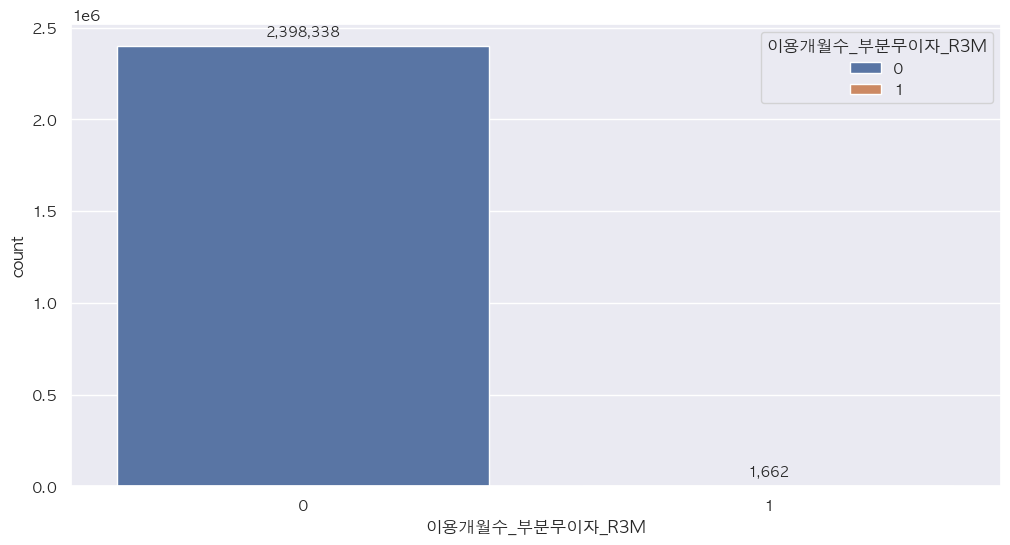

In [21]:
col8 = '이용개월수_부분무이자_R3M'.strip()
order8 = sorted(df1[col8].unique())

ax = sns.countplot(data=df1, x=col8, hue=col8, order=order8)
annotate_countplot(ax)
plt.show()

In [22]:
zero_count8 = (df1['이용개월수_부분무이자_R3M'] == 0).sum()
total8 = len(df1)
print(f"0값 개수: {zero_count8} ({zero_count8 / total8:.2%})")

0값 개수: 2398338 (99.93%)


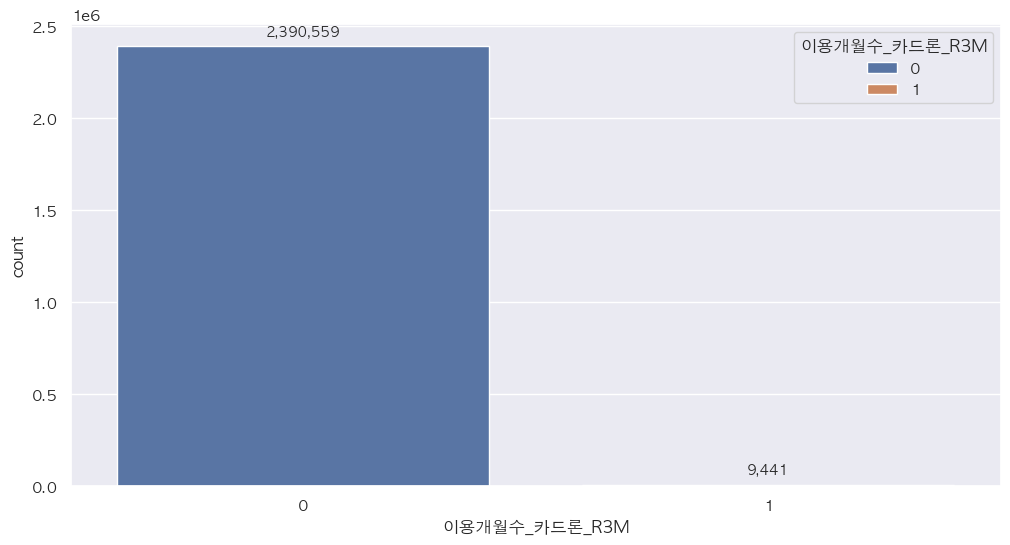

In [23]:
col9 = '이용개월수_카드론_R3M'.strip()
order9 = sorted(df1[col9].unique())

ax = sns.countplot(data=df1, x=col9, hue=col9, order=order9)
annotate_countplot(ax)
plt.show()

In [24]:
zero_count9 = (df1['이용개월수_카드론_R3M'] == 0).sum()
total9 = len(df1)
print(f"0값 개수: {zero_count9} ({zero_count9 / total9:.2%})")

0값 개수: 2390559 (99.61%)


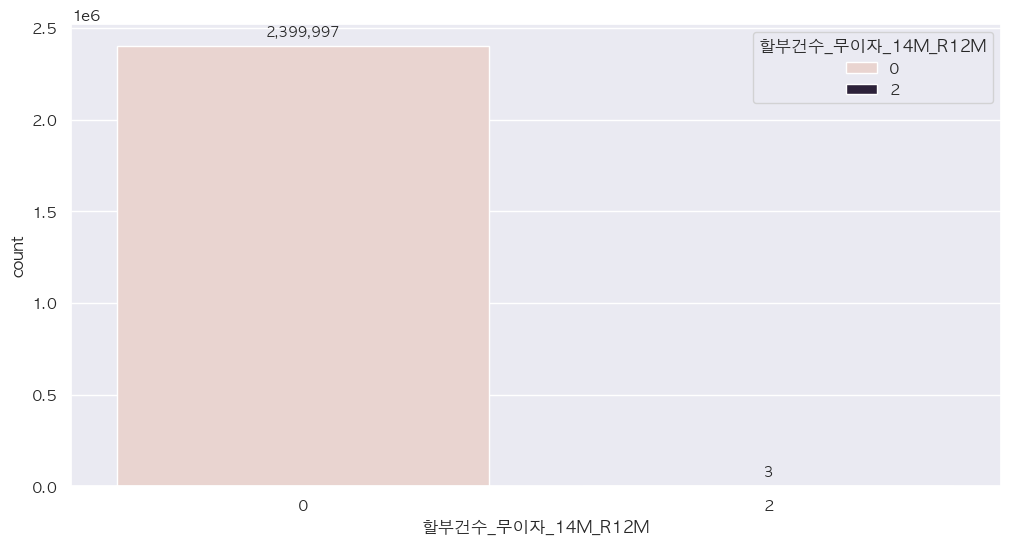

In [25]:
col10 = '할부건수_무이자_14M_R12M'.strip()
order10 = sorted(df1[col10].unique())

ax = sns.countplot(data=df1, x=col10, hue=col10, order=order10)
annotate_countplot(ax)
plt.show()

In [26]:
zero_count10 = (df1['할부건수_무이자_14M_R12M'] == 0).sum()
total10 = len(df1)
print(f"0값 개수: {zero_count10} ({zero_count10 / total10:.2%})")

0값 개수: 2399997 (100.00%)


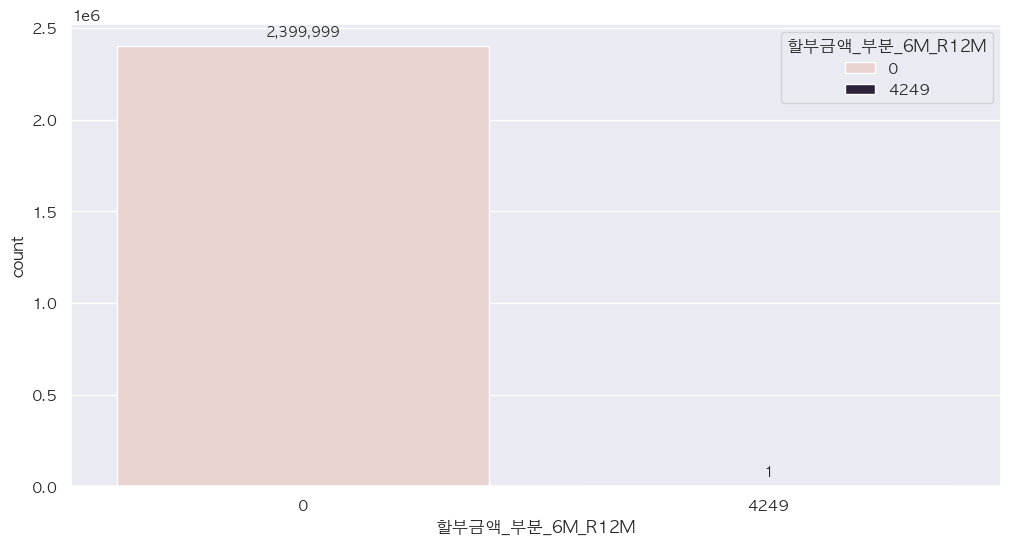

In [27]:
col11 = '할부금액_부분_6M_R12M'.strip()
order11 = sorted(df1[col11].unique())

ax = sns.countplot(data=df1, x=col11, hue=col11, order=order11)
annotate_countplot(ax)
plt.show()

In [28]:
zero_count11 = (df1['할부금액_부분_6M_R12M'] == 0).sum()
total11 = len(df1)
print(f"0값 개수: {zero_count11} ({zero_count11 / total11:.2%})")

0값 개수: 2399999 (100.00%)


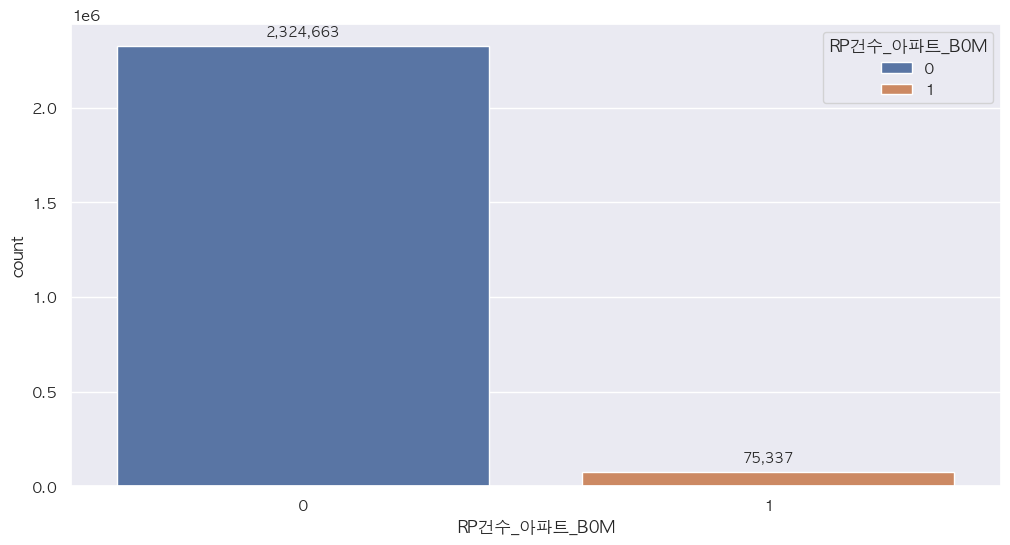

In [29]:
col12 = 'RP건수_아파트_B0M'.strip()
order12 = sorted(df1[col12].unique())

ax = sns.countplot(data=df1, x=col12, hue=col12, order=order12)
annotate_countplot(ax)
plt.show()

In [30]:
zero_count12 = (df1['RP건수_아파트_B0M'] == 0).sum()
total12 = len(df1)
print(f"0값 개수: {zero_count12} ({zero_count12 / total12:.2%})")

0값 개수: 2324663 (96.86%)


In [64]:
def plot_and_count_zero(df, column_name):
    # 고유값 정렬
    order = sorted(df[column_name].unique())
    
    # 카운트플롯
    ax = sns.countplot(data=df, x=column_name, hue=column_name, order=order)
    annotate_countplot(ax)
    plt.show()
    
    # 0 값 개수 계산
    zero_count = (df[column_name] == 0).sum()
    total = len(df)
    print(f"0값 개수: {zero_count} ({zero_count / total:.2%})")

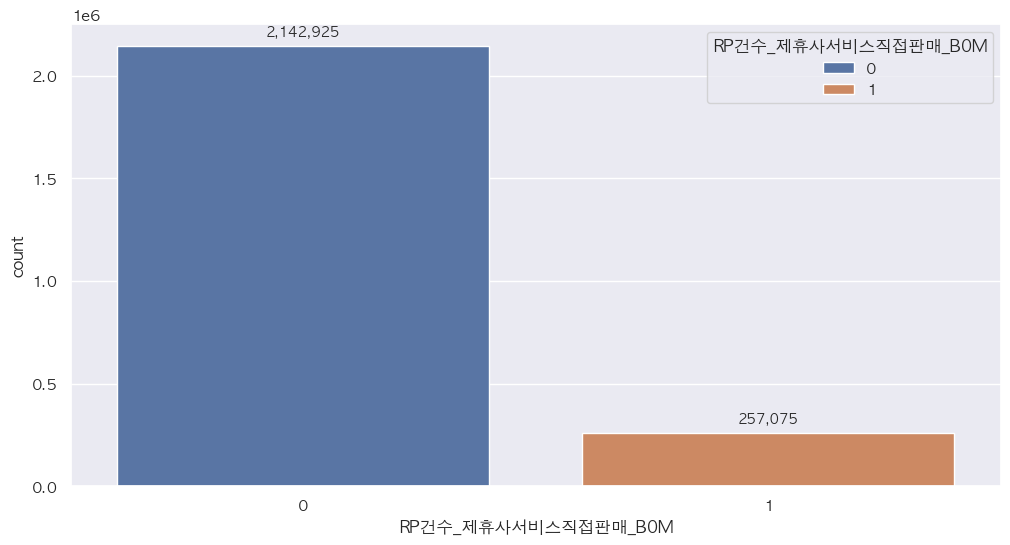

0값 개수: 2142925 (89.29%)


In [66]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP건수_제휴사서비스직접판매_B0M')

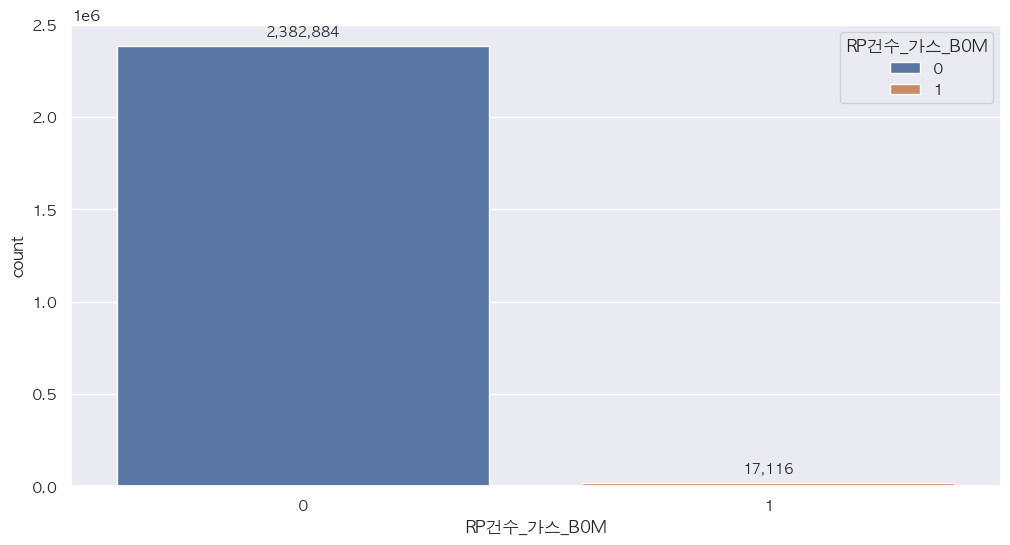

0값 개수: 2382884 (99.29%)


In [68]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP건수_가스_B0M')

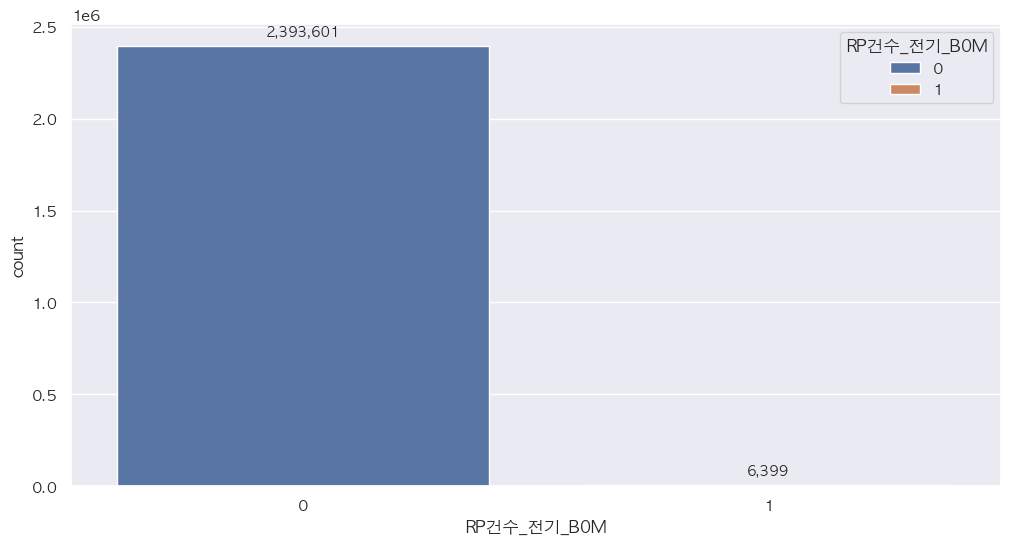

0값 개수: 2393601 (99.73%)


In [71]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP건수_전기_B0M')

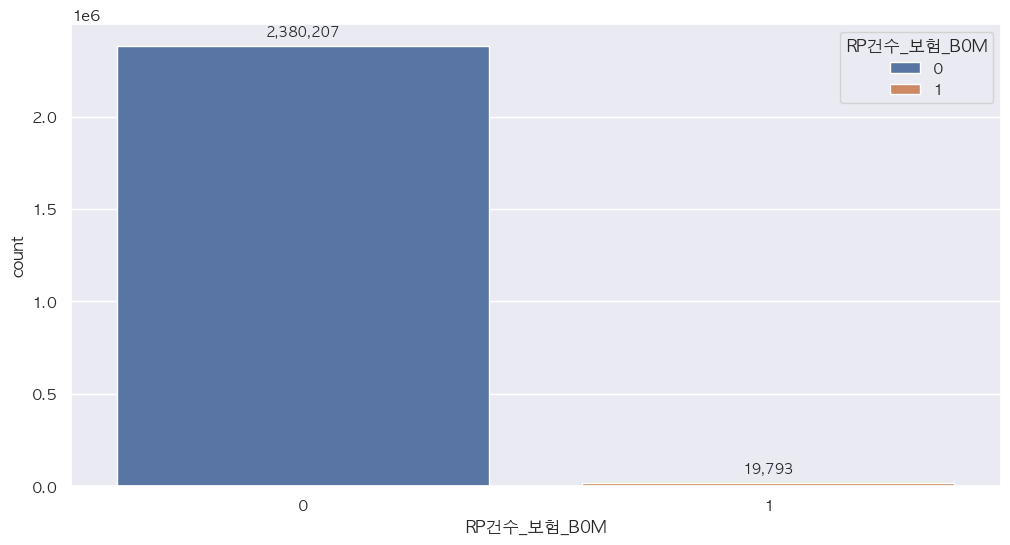

0값 개수: 2380207 (99.18%)


In [72]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP건수_보험_B0M')

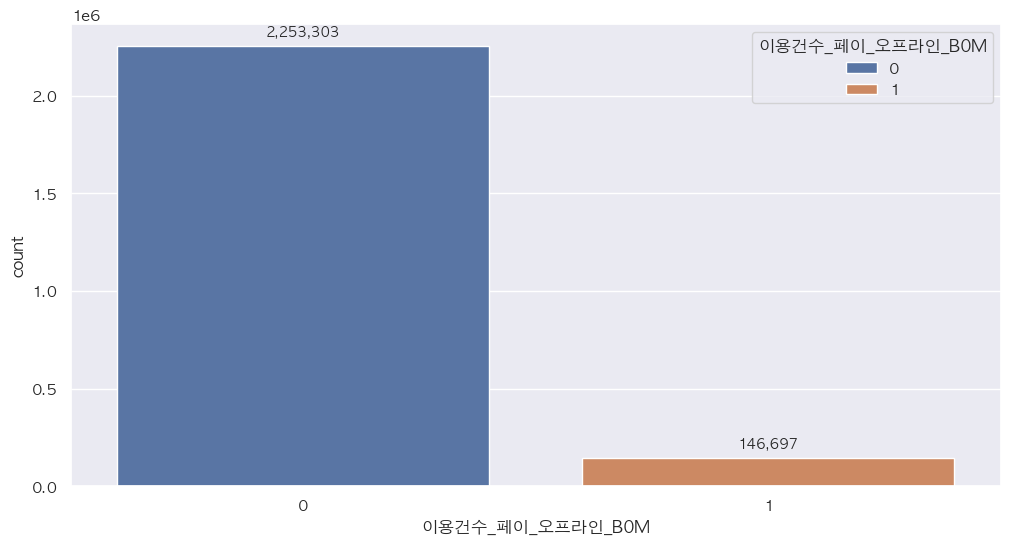

0값 개수: 2253303 (93.89%)


In [73]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_페이_오프라인_B0M')

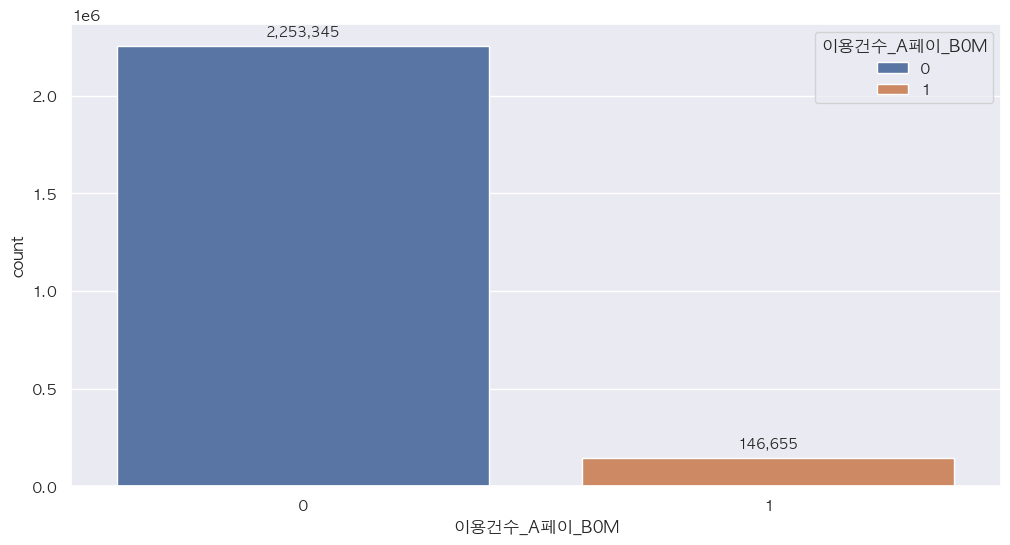

0값 개수: 2253345 (93.89%)


In [74]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_A페이_B0M')

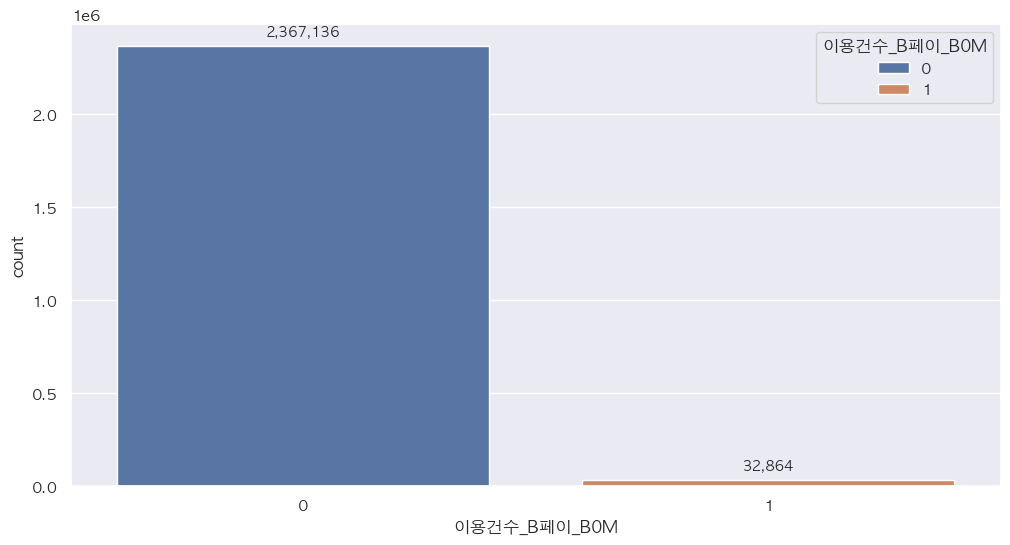

0값 개수: 2367136 (98.63%)


In [75]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_B페이_B0M')

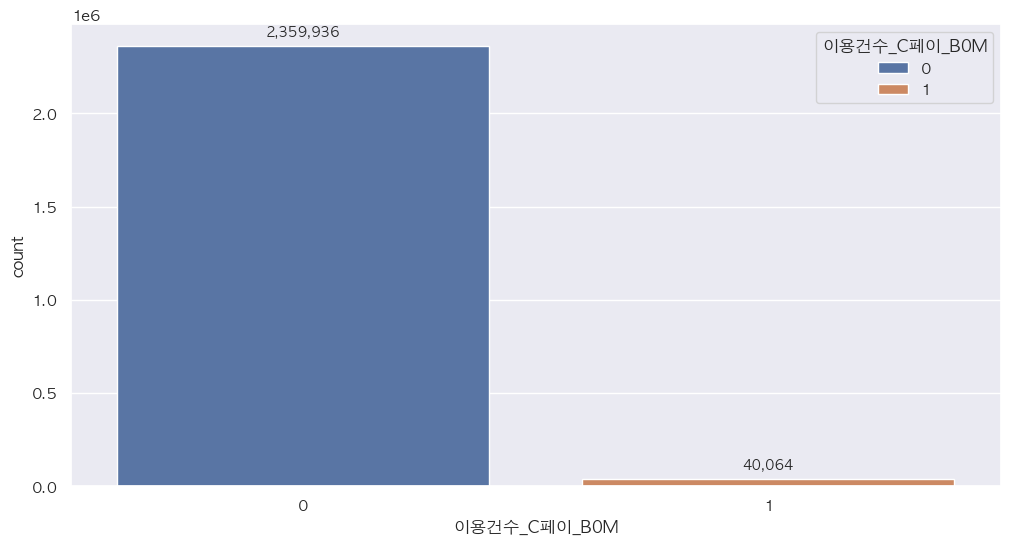

0값 개수: 2359936 (98.33%)


In [76]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_C페이_B0M')

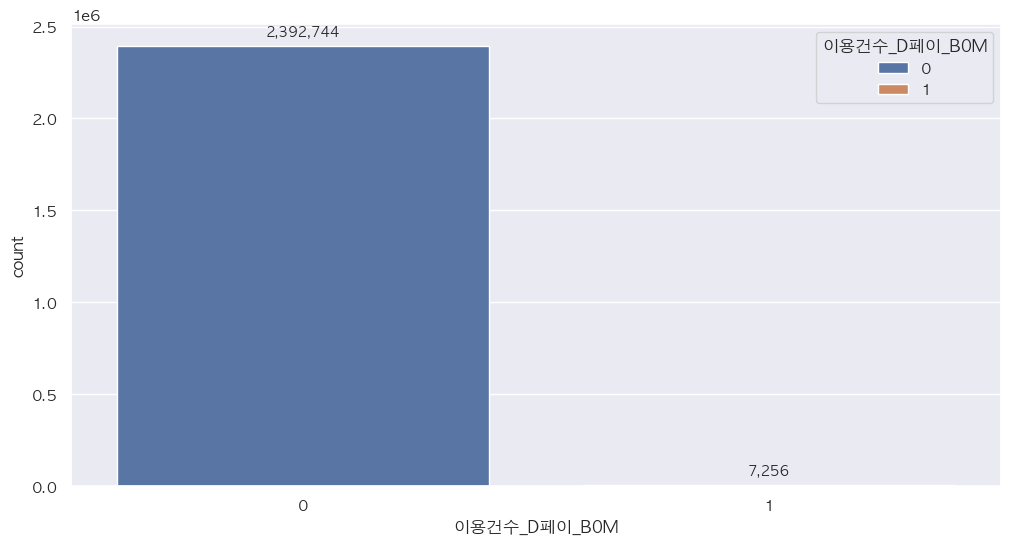

0값 개수: 2392744 (99.70%)


In [77]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_D페이_B0M')

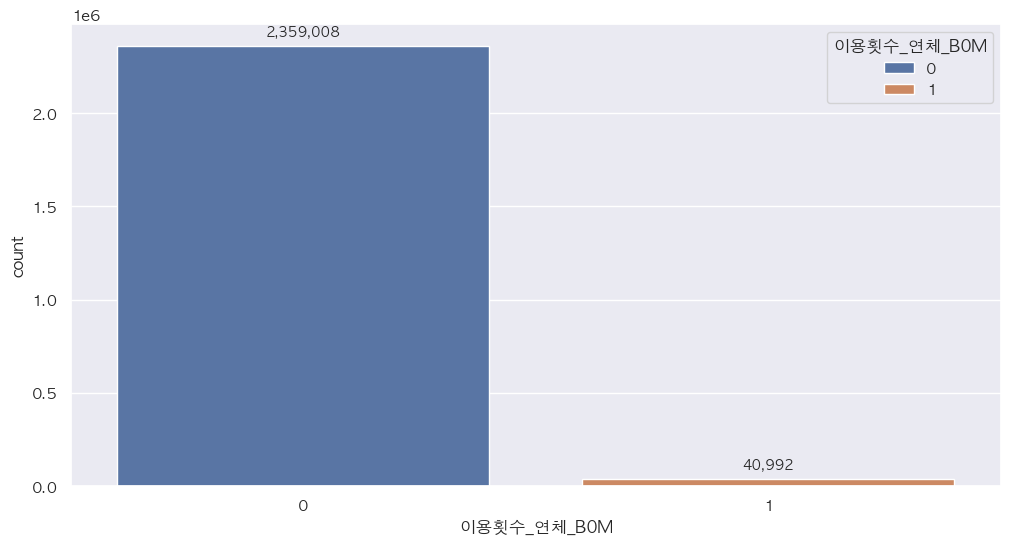

0값 개수: 2359008 (98.29%)


In [79]:
# 비율 확인하기
plot_and_count_zero(df1, '이용횟수_연체_B0M')

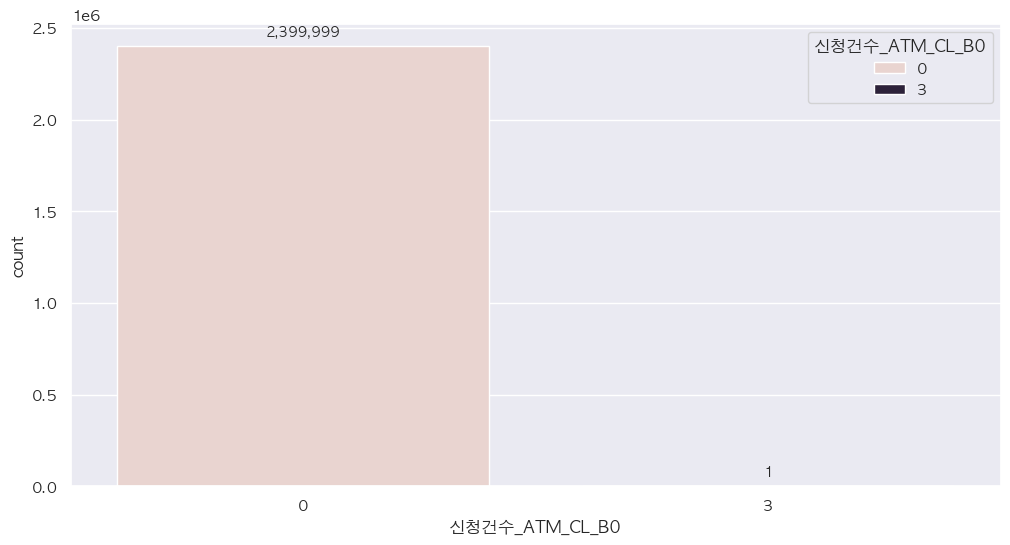

0값 개수: 2399999 (100.00%)


In [80]:
# 비율 확인하기
plot_and_count_zero(df1, '신청건수_ATM_CL_B0')

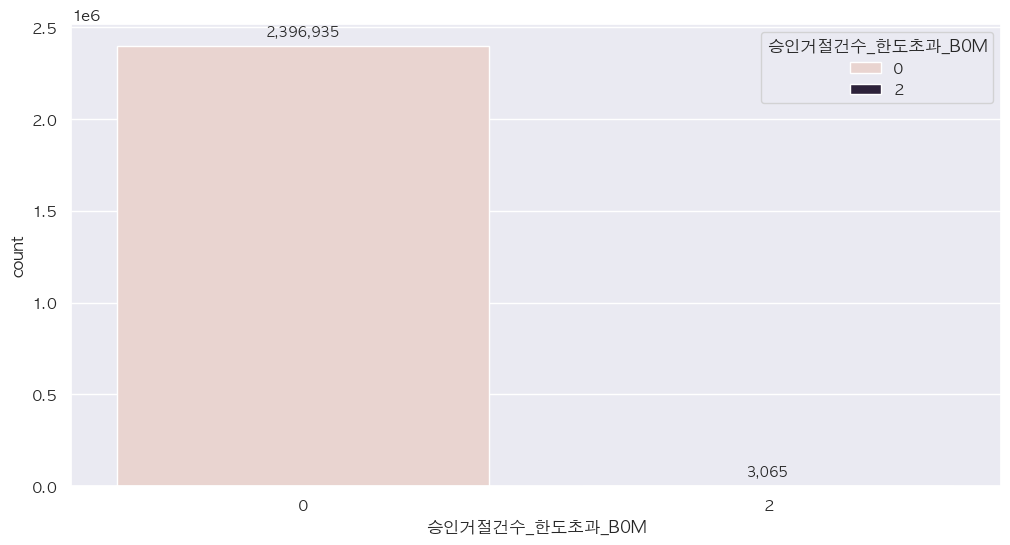

0값 개수: 2396935 (99.87%)


In [81]:
# 비율 확인하기
plot_and_count_zero(df1, '승인거절건수_한도초과_B0M')

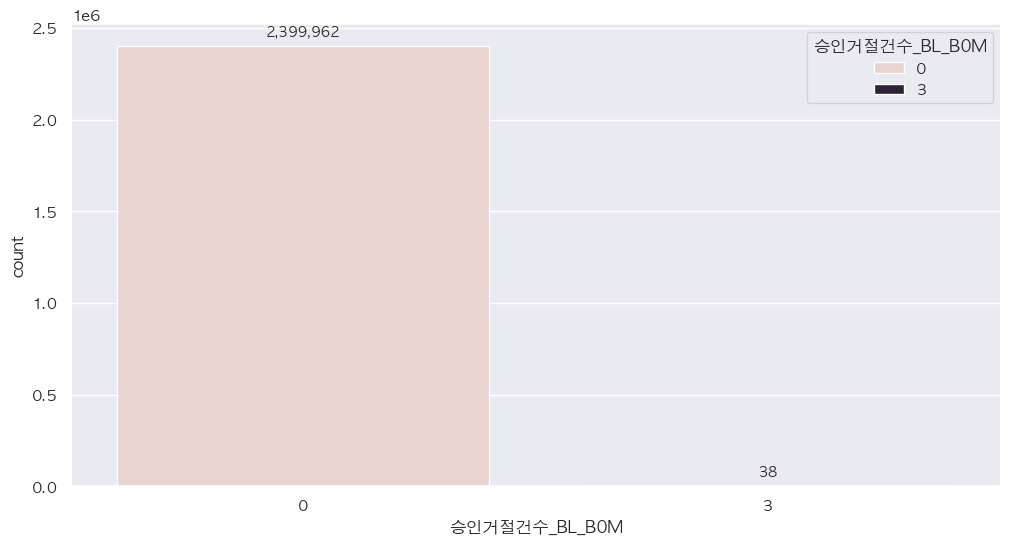

0값 개수: 2399962 (100.00%)


In [82]:
# 비율 확인하기
plot_and_count_zero(df1, '승인거절건수_BL_B0M')

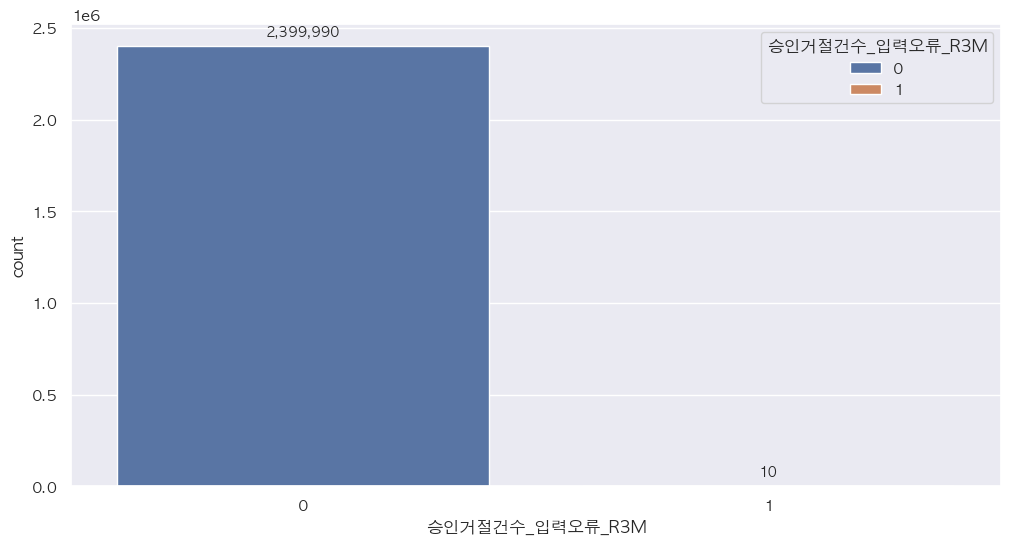

0값 개수: 2399990 (100.00%)


In [94]:
# 비율 확인하기
plot_and_count_zero(df1, '승인거절건수_입력오류_R3M')